# EDA – Heart Disease UCI
Load data and inspect distributions.

In [2]:
pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [4]:
print(y)

     num
0      0
1      2
2      1
3      0
4      0
..   ...
298    1
299    2
300    3
301    1
302    0

[303 rows x 1 columns]


In [5]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   45    1   1       110   264    0        0      132      0      1.2   
299   68    1   4       144   193    1        0      141      0      3.4   
300   57    1   4       130   131    0        0      115      1      1.2   
301   57    0   2       130   236    0        2      174      0      0.0   
302   38    1   3       138   175    0        0      173      0      0.0   

     slope   ca  thal  
0        3  0.0   6.0  
1        2  3.0   3.0  
2        2  2.0

In [6]:
!pip install seaborn


Step 1: Data Acquisition & Initial Cleaning

Fetch the dataset:

In [7]:

from ucimlrepo import fetch_ucirepo
import pandas as pd

heart_disease = fetch_ucirepo(id=45)
X = heart_disease.data.features
y = heart_disease.data.targets

# Combine into one DataFrame
df = pd.concat([X, y], axis=1)
df.columns = [c.strip().lower() for c in df.columns]  # normalize column names


Inspect the data:

In [8]:

print(df.shape)
print(df.info())
print(df.describe())
print(df.isnull().sum())  # check missing values


(303, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB
None
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416 

Handle missing values:

If any column has missing values, decide:

Drop rows with missing values (if few).
Or impute (mean/median for numeric, mode for categorical).

In [9]:

df.fillna(df.median(), inplace=True)


Encode categorical features:

Identify categorical columns (e.g., sex, cp, thal).
Use OneHotEncoder or pd.get_dummies() for quick EDA

In [10]:
df_encoded = pd.get_dummies(df, drop_first=True)

Step 2: Basic EDA Visualizations
Class balance:

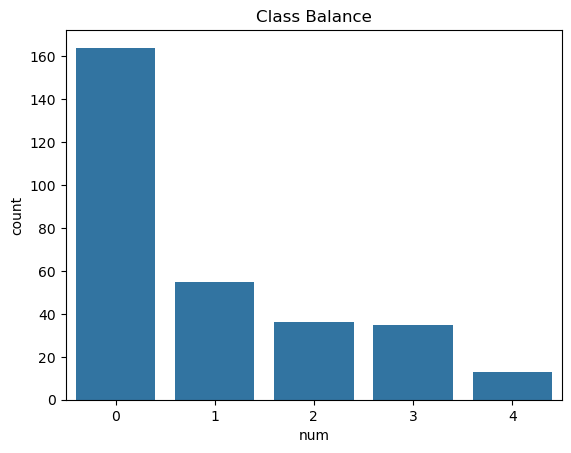

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='num', data=df)
plt.title('Class Balance')
plt.show()


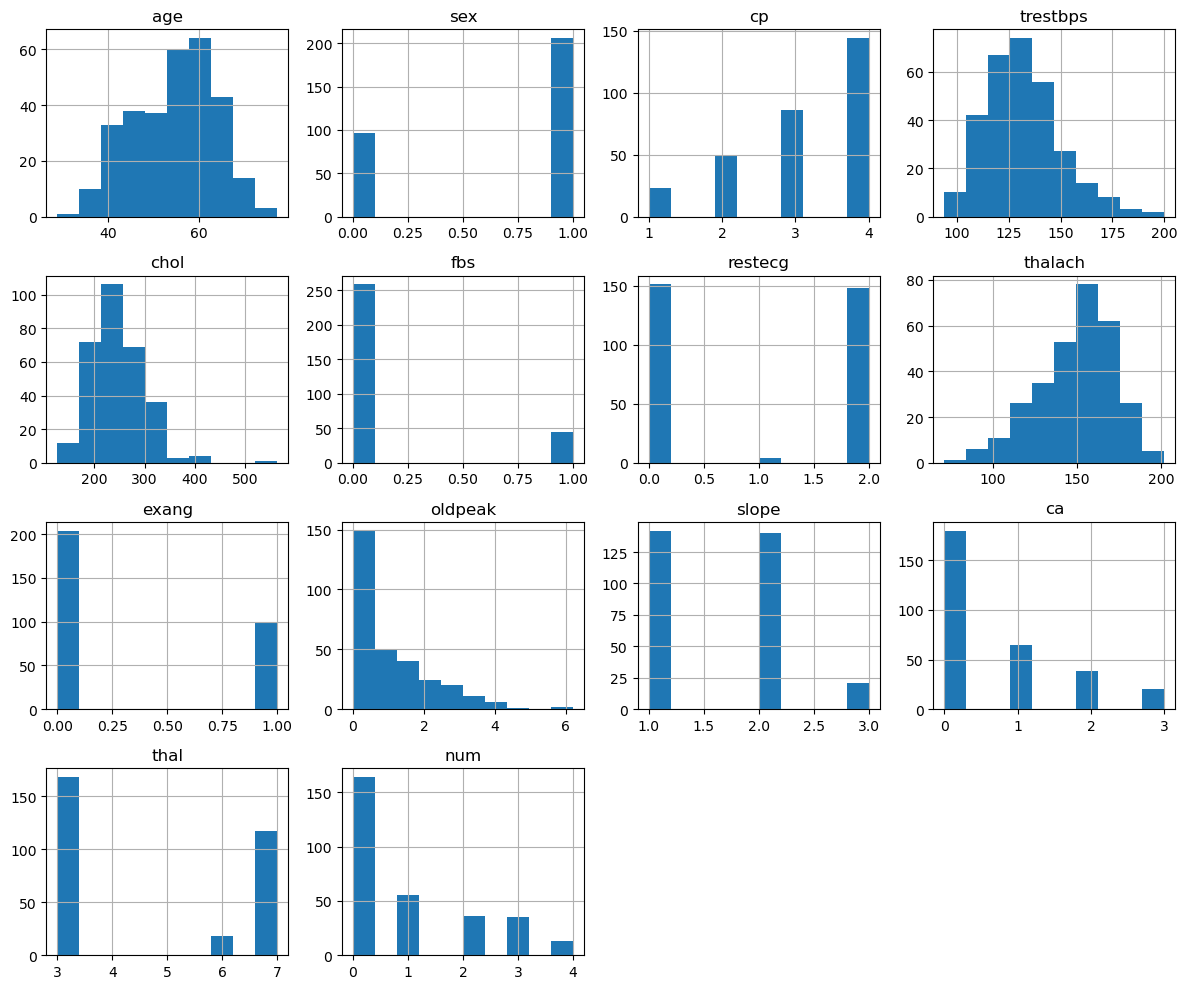

In [12]:

df.hist(figsize=(12,10))
plt.tight_layout()
plt.show()


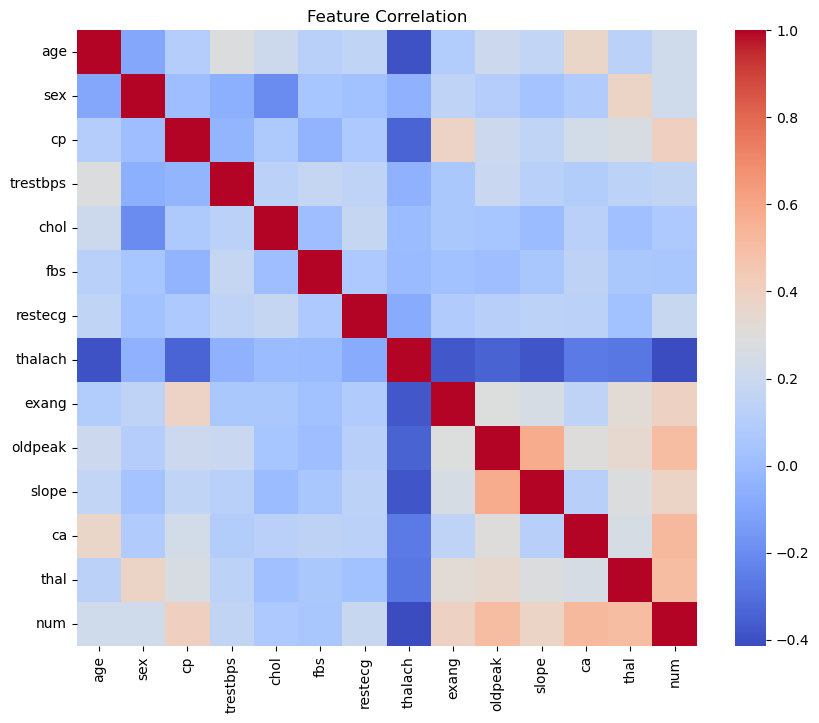

In [13]:

corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()


In [2]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

# Load without header
df = pd.read_csv(url, header=None, na_values="?")

# Add correct column names
columns = [
    "age","sex","cp","trestbps","chol","fbs","restecg","thalach",
    "exang","oldpeak","slope","ca","thal","target"
]
df.columns = columns

# Clean missing values
df = df.dropna().reset_index(drop=True)

# Convert target: >0 → 1, else 0
df["target"] = df["target"].apply(lambda x: 1 if x > 0 else 0)

df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [15]:

import os
save_dir = '/content/drive/MyDrive/Others'   # <- change if you prefer a different folder
os.makedirs(save_dir, exist_ok=True)


In [16]:

from ucimlrepo import fetch_ucirepo
import pandas as pd

# Fetch UCI Heart Disease
ds = fetch_ucirepo(id=45)
X = ds.data.features.copy()
y = ds.data.targets.copy()

# Ensure y is a Series named 'num'
if isinstance(y, pd.DataFrame):
    y = y.iloc[:, 0]
y.name = 'num'

# Combine and normalize column names
df = pd.concat([X, y], axis=1)
df.columns = [c.strip().lower() for c in df.columns]

# Optional: make binary target (presence of heart disease)
df['target'] = (df['num'] > 0).astype(int)

# Save files
df.to_csv(os.path.join(save_dir, 'heart.csv'), index=False)               # features + num + target
df.drop(columns=['num']).to_csv(os.path.join(save_dir, 'heart_binary.csv'), index=False)  # binary target only

print('Saved:')
print(' -', os.path.join(save_dir, 'heart.csv'))
print(' -', os.path.join(save_dir, 'heart_binary.csv'))


Saved:
 - /content/drive/MyDrive/Others\heart.csv
 - /content/drive/MyDrive/Others\heart_binary.csv


Step‑2 — Feature Engineering & Model Development

In [17]:

# Core
import numpy as np
import pandas as pd

# Modeling
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_validate, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Metrics & plots
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


2.1 Prepare data & target

In [18]:

# If df is NOT already defined in your notebook, uncomment the next block to load:
# from ucimlrepo import fetch_ucirepo
# heart_disease = fetch_ucirepo(id=45)
# X = heart_disease.data.features
# y = heart_disease.data.targets
# df = pd.concat([X, y], axis=1)
# df.columns = [c.strip().lower() for c in df.columns]

# Binary target: presence of heart disease (typical formulation)
# UCI 'num' is 0..4; treat >0 as disease present (1), else absent (0)
df['target'] = (df['num'] > 0).astype(int)

# Feature set (drop original multiclass target)
X = df.drop(columns=['num', 'target'])
y = df['target']


2.2 Feature typing

In [19]:

categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
numeric_cols     = [c for c in X.columns if c not in categorical_cols]  # includes age, trestbps, chol, thalach, oldpeak, ca

print("Categorical:", categorical_cols)
print("Numeric    :", numeric_cols)


Categorical: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
Numeric    : ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']


2.3 Preprocessing pipeline

Numeric: median imputation ➜ standard scaling
Categorical: most‑frequent imputation ➜ one‑hot (ignore unseen categories in CV)

In [20]:

numeric_tf = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler',  StandardScaler())
])

categorical_tf = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot',  OneHotEncoder(handle_unknown='ignore'))
])

preprocess = ColumnTransformer(
    transformers=[
        ('num',  numeric_tf,     numeric_cols),
        ('cat',  categorical_tf, categorical_cols)
    ],
    remainder='drop'  # just to be explicit
)


2.4 Model candidates & tuning grids
We’ll optimize primarily for ROC‑AUC (good for imbalanced/binary problems) and report accuracy/precision/recall alongside.

Logistic Regression: regularization strength C, penalty l2, solver liblinear/saga, with class_weight='balanced'.
Random Forest: n_estimators, max_depth, min_samples_leaf, max_features, with class_weight='balanced'.

In [21]:

# # --- Pipelines
# logreg_pipe = Pipeline(steps=[
#     ('prep', preprocess),
#     ('clf',  LogisticRegression(max_iter=5000, class_weight='balanced'))
# ])

# rf_pipe = Pipeline(steps=[
#     ('prep', preprocess),
#     ('clf',  RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1))
# ])

# # --- Grids (fix typos: 'l2' not '12'; param names with __) ---
# logreg_grid = {
#     'clf__penalty': ['l2'],
#     'clf__solver':  ['liblinear', 'saga'],
#     'clf__C':       [0.01, 0.1, 1.0, 3.0, 10.0]
# }

# rf_grid = {
#     'clf__n_estimators':    [200, 400, 800],
#     'clf__max_depth':       [None, 5, 10, 20],
#     'clf__min_samples_leaf':[1, 2, 4],
#     'clf__max_features':    ['sqrt', 'log2']
# }

# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# # --- GridSearch (use X, y consistently; fix n_jobs and cv) ---
# logreg_gs = GridSearchCV(
#     estimator=logreg_pipe,
#     param_grid=logreg_grid,
#     scoring='roc_auc',
#     cv=skf,
#     n_jobs=-1,
#     refit=True
# ).fit(X, y)

# rf_gs = GridSearchCV(
#     estimator=rf_pipe,
#     param_grid=rf_grid,
#     scoring='roc_auc',
#     cv=skf,
#     n_jobs=-1,
#     refit=True
# ).fit(X, y)

# print("LogReg best ROC-AUC:", logreg_gs.best_score_, "best params:", logreg_gs.best_params_)
# print("RF     best ROC-AUC:", rf_gs.best_score_,     "best params:", rf_gs.best_params_)

# # --- Final evaluation with cross_validate (consistent X, y) ---
# scoring = {'accuracy':'accuracy','precision':'precision','recall':'recall','roc_auc':'roc_auc'}

# logreg_cv = cross_validate(logreg_gs.best_estimator_, X, y, cv=skf, scoring=scoring, n_jobs=-1)
# rf_cv     = cross_validate(rf_gs.best_estimator_,     X, y, cv=skf, scoring=scoring, n_jobs=-1)

# def summarize_cv(name, cvres):
#     print(f"\n{name} (5-fold CV)")
#     for k in ['test_accuracy','test_precision','test_recall','test_roc_auc']:
#         print(f"  {k.replace('test_','').upper():10s}: mean={cvres[k].mean():.3f}  std={cvres[k].std():.3f}")

# summarize_cv("Logistic Regression", logreg_cv)
# summarize_cv("Random Forest",      rf_cv)

# # --- Out-of-fold ROC curves (fix variable names and labels) ---
# y_proba_lr = cross_val_predict(logreg_gs.best_estimator_, X, y, cv=skf, method='predict_proba', n_jobs=-1)[:, 1]
# y_proba_rf = cross_val_predict(rf_gs.best_estimator_,     X, y, cv=skf, method='predict_proba', n_jobs=-1)[:, 1]

# from sklearn.metrics import roc_curve, roc_auc_score
# fpr_lr, tpr_lr, _ = roc_curve(y, y_proba_lr)
# fpr_rf, tpr_rf, _ = roc_curve(y, y_proba_rf)
# auc_lr = roc_auc_score(y, y_proba_lr)
# auc_rf = roc_auc_score(y, y_proba_rf)

# plt.figure(figsize=(7,5))
# plt.plot(fpr_lr, tpr_lr, label=f'LogReg (AUC={auc_lr:.3f})', lw=2)
# plt.plot(fpr_rf, tpr_rf, label=f'RandomForest (AUC={auc_rf:.3f})', lw=2)
# plt.plot([0,1],[0,1],'k--',alpha=0.5)
# plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
# plt.title('Cross-validated ROC Curves'); plt.legend(); plt.grid(alpha=0.2)
# plt.show()


In [22]:

# Base pipelines
logreg_pipe = Pipeline(steps=[
    ('prep', preprocess),
    ('clf',  LogisticRegression(max_iter=5000, class_weight='balanced', n_jobs=None))
])

rf_pipe = Pipeline(steps=[
    ('prep', preprocess),
    ('clf',  RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1))
])

# Hyperparameter grids
logreg_grid = {
    'clf__penalty': ['l2'],
    'clf__solver':  ['liblinear', 'saga'],
    'clf__C':       [0.01, 0.1, 1.0, 3.0, 10.0]
}

rf_grid = {
    'clf__n_estimators':   [200, 400, 800],
    'clf__max_depth':      [None, 5, 10, 20],
    'clf__min_samples_leaf':[1, 2, 4],
    'clf__max_features':   ['sqrt', 'log2']
}


2.5 Cross‑validation & model selection
Use StratifiedKFold to preserve class balance across folds. Optimize by ROC‑AUC; keep refit on the best params.

In [23]:

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Logistic Regression selection
logreg_gs = GridSearchCV(
    estimator=logreg_pipe,
    param_grid=logreg_grid,
    scoring='roc_auc',
    cv=skf,
    n_jobs=-1,
    refit=True
)
logreg_gs.fit(X, y)

# Random Forest selection
rf_gs = GridSearchCV(
    estimator=rf_pipe,
    param_grid=rf_grid,
    scoring='roc_auc',
    cv=skf,
    n_jobs=-1,
    refit=True
)
rf_gs.fit(X, y)

print("LogReg best ROC-AUC:", logreg_gs.best_score_, "best params:", logreg_gs.best_params_)
print("RF     best ROC-AUC:", rf_gs.best_score_,     "best params:", rf_gs.best_params_)


LogReg best ROC-AUC: 0.9193277016193683 best params: {'clf__C': 0.1, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
RF     best ROC-AUC: 0.9200985549943883 best params: {'clf__max_depth': 10, 'clf__max_features': 'log2', 'clf__min_samples_leaf': 1, 'clf__n_estimators': 200}


2.6 Final evaluation with stratified cross‑validation
Report accuracy, precision, recall, ROC‑AUC for each best model using cross_validate. (This evaluates generalization beyond the refit scores.)

In [24]:

scoring = {
    'accuracy':  'accuracy',
    'precision': 'precision',
    'recall':    'recall',
    'roc_auc':   'roc_auc'
}

# Evaluate best Logistic Regression
logreg_cv = cross_validate(
    logreg_gs.best_estimator_,
    X, y,
    cv=skf,
    scoring=scoring,
    n_jobs=-1,
    return_train_score=False
)

# Evaluate best Random Forest
rf_cv = cross_validate(
    rf_gs.best_estimator_,
    X, y,
    cv=skf,
    scoring=scoring,
    n_jobs=-1,
    return_train_score=False
)

def summarize_cv(name, cvres):
    print(f"\n{name} (5-fold CV)")
    for k in ['test_accuracy','test_precision','test_recall','test_roc_auc']:
        print(f"  {k.replace('test_','').upper():10s}: "
              f"mean={cvres[k].mean():.3f}  std={cvres[k].std():.3f}")

summarize_cv("Logistic Regression", logreg_cv)
summarize_cv("Random Forest",      rf_cv)



Logistic Regression (5-fold CV)
  ACCURACY  : mean=0.858  std=0.034
  PRECISION : mean=0.866  std=0.052
  RECALL    : mean=0.820  std=0.063
  ROC_AUC   : mean=0.919  std=0.021

Random Forest (5-fold CV)
  ACCURACY  : mean=0.819  std=0.018
  PRECISION : mean=0.836  std=0.043
  RECALL    : mean=0.755  std=0.027
  ROC_AUC   : mean=0.920  std=0.023


2.7 Cross‑validated ROC curve (optional)
Plot ROC using out‑of‑fold probabilities from cross_val_predict.

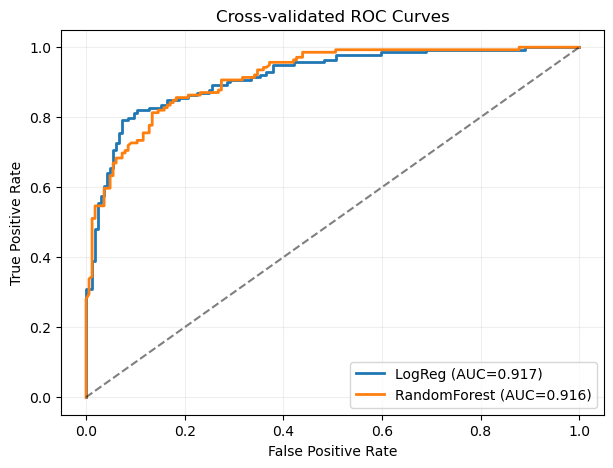

In [25]:

# Cross-validated probabilities
y_proba_lr = cross_val_predict(
    logreg_gs.best_estimator_, X, y, cv=skf, method='predict_proba', n_jobs=-1
)[:, 1]

y_proba_rf = cross_val_predict(
    rf_gs.best_estimator_, X, y, cv=skf, method='predict_proba', n_jobs=-1
)[:, 1]

# ROC curves
fpr_lr, tpr_lr, _ = roc_curve(y, y_proba_lr)
fpr_rf, tpr_rf, _ = roc_curve(y, y_proba_rf)
auc_lr = roc_auc_score(y, y_proba_lr)
auc_rf = roc_auc_score(y, y_proba_rf)

plt.figure(figsize=(7,5))
plt.plot(fpr_lr, tpr_lr, label=f'LogReg (AUC={auc_lr:.3f})', lw=2)
plt.plot(fpr_rf, tpr_rf, label=f'RandomForest (AUC={auc_rf:.3f})', lw=2)
plt.plot([0,1],[0,1],'k--',alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Cross-validated ROC Curves')
plt.legend()
plt.grid(alpha=0.2)
plt.show()


2.8 Inspect feature contributions

For Random Forest, you can review global feature importances (after one‑hot).
For Logistic Regression, inspect coefficients per one‑hot feature.

In [26]:

# RF feature importances
rf_best = rf_gs.best_estimator_
feat_names = rf_best.named_steps['prep'].get_feature_names_out()
importances = rf_best.named_steps['clf'].feature_importances_

fi = pd.DataFrame({'feature': feat_names, 'importance': importances}) \
       .sort_values('importance', ascending=False)
print("\nTop 10 RF features:\n", fi.head(10))

# Logistic coefficients
lr_best = logreg_gs.best_estimator_
coefs = lr_best.named_steps['clf'].coef_.ravel()
lr_df = pd.DataFrame({'feature': feat_names, 'coef': coefs}) \
          .sort_values('coef', ascending=False)
print("\nTop +ve LR features:\n", lr_df.head(10))
print("\nTop -ve LR features:\n", lr_df.tail(10))



Top 10 RF features:
            feature  importance
3     num__thalach    0.105199
5          num__ca    0.097158
4     num__oldpeak    0.090188
11     cat__cp_4.0    0.082654
0         num__age    0.078461
22   cat__thal_3.0    0.074639
2        num__chol    0.067413
1    num__trestbps    0.064334
24   cat__thal_7.0    0.061038
17  cat__exang_0.0    0.040133

Top +ve LR features:
              feature      coef
5            num__ca  0.730989
11       cat__cp_4.0  0.632781
24     cat__thal_7.0  0.490756
4       num__oldpeak  0.350549
7       cat__sex_1.0  0.345335
18    cat__exang_1.0  0.290370
20    cat__slope_2.0  0.276496
1      num__trestbps  0.212711
2          num__chol  0.126396
16  cat__restecg_2.0  0.119065

Top -ve LR features:
              feature      coef
9        cat__cp_2.0 -0.086389
13      cat__fbs_1.0 -0.088482
14  cat__restecg_0.0 -0.174591
8        cat__cp_1.0 -0.208743
19    cat__slope_1.0 -0.280302
17    cat__exang_0.0 -0.333673
3       num__thalach -0.344702
10

In [27]:

def cv_report(name, cvres):
    metrics = ['test_accuracy','test_precision','test_recall','test_roc_auc']
    row = {m.replace('test_',''): (cvres[m].mean(), cvres[m].std()) for m in metrics}
    print(f"\n{name} CV summary")
    for m,(mu,s) in row.items():
        print(f"{m:9s}: {mu:.3f} ± {s:.3f}")

cv_report("Logistic Regression", logreg_cv)
cv_report("Random Forest",      rf_cv)



Logistic Regression CV summary
accuracy : 0.858 ± 0.034
precision: 0.866 ± 0.052
recall   : 0.820 ± 0.063
roc_auc  : 0.919 ± 0.021

Random Forest CV summary
accuracy : 0.819 ± 0.018
precision: 0.836 ± 0.043
recall   : 0.755 ± 0.027
roc_auc  : 0.920 ± 0.023


3. Experiment Tracking [5 marks]
Integrate MLflow (or a similar tool) for experiment tracking. Log parameters, metrics, artifacts, and plots for all runs.

In [28]:
pip install mlflow

In [36]:
!pip install mlflow
!mlflow ui --port 5000 --host 0.0.0.0



^C


In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np
import mlflow
import mlflow.sklearn
import json

from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    roc_auc_score, confusion_matrix, roc_curve, classification_report
)


In [11]:
mlflow.set_experiment("Heart-Disease-Experiment")


<Experiment: artifact_location='file:///c:/Users/cheng/Downloads/mlruns/596343882143462109', creation_time=1765112026872, experiment_id='596343882143462109', last_update_time=1765112026872, lifecycle_stage='active', name='Heart-Disease-Experiment', tags={}>

In [3]:
# Create mlruns folder
MLRUNS_DIR = Path("mlruns").absolute()
MLRUNS_DIR.mkdir(exist_ok=True)

# Convert Windows path ---> POSIX "file:///" path
mlruns_uri = "file:///" + str(MLRUNS_DIR).replace("\\", "/")

print("Using MLflow URI:", mlruns_uri)

# Set MLflow tracking URI
mlflow.set_tracking_uri(mlruns_uri)

# Set experiment
mlflow.set_experiment("Heart-Disease-Experiment")


Using MLflow URI: file:///c:/Users/cheng/Downloads/mlruns


c:\Users\cheng\anaconda3\Lib\site-packages\mlflow\tracking\_tracking_service\utils.py:177: FutureWarning: The filesystem tracking backend (e.g., './mlruns') will be deprecated in February 2026. Consider transitioning to a database backend (e.g., 'sqlite:///mlflow.db') to take advantage of the latest MLflow features. See https://github.com/mlflow/mlflow/issues/18534 for more details and migration guidance. For migrating existing data, https://github.com/mlflow/mlflow-export-import can be used.
  return FileStore(store_uri, store_uri)


<Experiment: artifact_location='file:///c:/Users/cheng/Downloads/mlruns/596343882143462109', creation_time=1765112026872, experiment_id='596343882143462109', last_update_time=1765112026872, lifecycle_stage='active', name='Heart-Disease-Experiment', tags={}>

In [4]:
def log_confusion_matrix(y_true, y_pred, filename):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.savefig(filename, bbox_inches="tight")
    plt.close()

def log_roc_curve(y_true, y_pred_proba, filename):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    plt.figure(figsize=(5,4))
    plt.plot(fpr, tpr, label="ROC Curve")
    plt.plot([0,1],[0,1],'--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.savefig(filename, bbox_inches="tight")
    plt.close()


In [5]:
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

import joblib
Path("artifacts").mkdir(exist_ok=True)
joblib.dump(scaler, "artifacts/scaler.joblib")


['artifacts/scaler.joblib']

In [6]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_s, y_train)

lr_preds = lr.predict(X_test_s)

rf = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=42)
rf.fit(X_train_s, y_train)

rf_preds = rf.predict(X_test_s)

In [8]:
def log_confusion_matrix(y_true, y_pred, filename):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix")
    plt.savefig(filename)
    plt.close()

def log_roc_curve(y_true, y_pred_prob, filename):
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    plt.figure(figsize=(5,4))
    plt.plot(fpr, tpr, label="ROC Curve")
    plt.plot([0,1], [0,1], '--')
    plt.title("ROC Curve")
    plt.savefig(filename)
    plt.close()


In [9]:
with mlflow.start_run(run_name="Logistic_Regression"):

    # Log hyperparameters
    mlflow.log_param("model", "LogisticRegression")
    mlflow.log_param("max_iter", 1000)

    # Log metrics
    lr_acc = accuracy_score(y_test, lr_preds)
    lr_prec = precision_score(y_test, lr_preds)
    lr_rec = recall_score(y_test, lr_preds)
    lr_auc = roc_auc_score(y_test, lr_preds)

    mlflow.log_metric("accuracy", lr_acc)
    mlflow.log_metric("precision", lr_prec)
    mlflow.log_metric("recall", lr_rec)
    mlflow.log_metric("roc_auc", lr_auc)

    # Log model
    mlflow.sklearn.log_model(lr, "model")

    # Log artifacts (plots)
    Path("mlflow_artifacts").mkdir(exist_ok=True)

    # Confusion matrix
    cm_path = "mlflow_artifacts/lr_confusion_matrix.png"
    log_confusion_matrix(y_test, lr_preds, cm_path)
    mlflow.log_artifact(cm_path)

    # ROC curve
    lr_prob = lr.predict_proba(X_test_s)[:,1]
    roc_path = "mlflow_artifacts/lr_roc_curve.png"
    log_roc_curve(y_test, lr_prob, roc_path)
    mlflow.log_artifact(roc_path)

    # Log scaler
    mlflow.log_artifact("artifacts/scaler.joblib")

print("LR experiment logged!")


2025/12/24 20:05:56 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh(<full-path-to-git-executable>)

All git commands will error until this is rectified.

This initial message can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|silent|none|n|0: for no message or exception
    - warn|w|warning|log|l|1: for a warning message (logging level CRITICAL, displayed by default)
    - error|e|exception|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet

2025/12/24 20:05:56 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instea

LR experiment logged!


In [10]:
with mlflow.start_run(run_name="Random_Forest"):

    mlflow.log_param("model", "RandomForestClassifier")
    mlflow.log_param("n_estimators", 200)
    mlflow.log_param("max_depth", 5)

    # Log metrics
    rf_acc = accuracy_score(y_test, rf_preds)
    rf_prec = precision_score(y_test, rf_preds)
    rf_rec = recall_score(y_test, rf_preds)
    rf_auc = roc_auc_score(y_test, rf_preds)

    mlflow.log_metric("accuracy", rf_acc)
    mlflow.log_metric("precision", rf_prec)
    mlflow.log_metric("recall", rf_rec)
    mlflow.log_metric("roc_auc", rf_auc)

    # Log model
    mlflow.sklearn.log_model(rf, "model")

    # Confusion matrix
    cm_path = "mlflow_artifacts/rf_confusion_matrix.png"
    log_confusion_matrix(y_test, rf_preds, cm_path)
    mlflow.log_artifact(cm_path)

    # ROC curve
    rf_prob = rf.predict_proba(X_test_s)[:,1]
    roc_path = "mlflow_artifacts/rf_roc_curve.png"
    log_roc_curve(y_test, rf_prob, roc_path)
    mlflow.log_artifact(roc_path)

    # Log scaler
    mlflow.log_artifact("artifacts/scaler.joblib")

print("RF experiment logged!")


2025/12/24 20:06:36 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


RF experiment logged!


4. Model Packaging & Reproducibility [7 marks]
Save the final model in a reusable format (e.g., MLflow, pickle, ONNX). Write a clean requirements.txt (or Conda env file). Provide a preprocessing pipeline/transformers to ensure full reproducibility.

In [9]:
# --- create preprocess.py file dynamically ---
preprocess_code = """
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

def load_data(path):
    return pd.read_csv(path)

def create_preprocessing_pipeline(numeric_features, categorical_features):
    numeric_transformer = StandardScaler()
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ]
    )
    return preprocessor
"""

with open("preprocess.py", "w") as f:
    f.write(preprocess_code)

print("✔ preprocess.py created!")


✔ preprocess.py created!


In [10]:
# Create data folder
os.makedirs("data", exist_ok=True)

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

# Load raw dataset
df = pd.read_csv(url, header=None, na_values="?")

# Add column names
columns = [
    "age","sex","cp","trestbps","chol","fbs","restecg","thalach",
    "exang","oldpeak","slope","ca","thal","target"
]
df.columns = columns

# Clean dataset
df = df.dropna().reset_index(drop=True)
df["target"] = df["target"].apply(lambda x: 1 if x > 0 else 0)

# Save locally
df.to_csv("data/heart.csv", index=False)

print("Saved to data/heart.csv successfully!")


Saved to data/heart.csv successfully!


In [ ]:
SEED = 42

def set_seed(seed=SEED):
    random.seed(seed)
    np.random.seed(seed)


# Load cleaned dataset (from UCI)
def load_data():
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
    df = pd.read_csv(url, header=None, na_values="?")

    df.columns = [
        "age","sex","cp","trestbps","chol","fbs","restecg","thalach",
        "exang","oldpeak","slope","ca","thal","target"
    ]

    df = df.dropna().reset_index(drop=True)
    df["target"] = df["target"].apply(lambda x: 1 if x > 0 else 0)
    return df


def create_preprocessing_pipeline(numeric_features, categorical_features):
    numeric_transformer = StandardScaler()

    return ColumnTransformer(
        transformers=[
            ("num", numeric_transformer, numeric_features),
            ("cat", "passthrough", categorical_features)
        ]
    )


def save_confusion_matrix(y_true, y_pred, path):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.savefig(path)
    plt.close()


def save_roc_curve(y_true, y_prob, path):
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(path)
    plt.close()


def main():
    set_seed()

    df = load_data()

    X = df.drop(columns=["target"])
    y = df["target"]

    numeric_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]
    categorical_features = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]

    preprocess = create_preprocessing_pipeline(numeric_features, categorical_features)
    model = LogisticRegression(max_iter=2000, random_state=SEED)

    pipeline = Pipeline([
        ("preprocess", preprocess),
        ("classifier", model)
    ])

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=SEED, stratify=y
    )

    # ---------------- MLflow Setup ----------------
    mlflow.set_tracking_uri("file:///C:/Users/cheng/Downloads/mlruns")
    mlflow.set_experiment("Heart-Disease-MLflow")
    
    with mlflow.start_run():

        # Store dataset
        os.makedirs("mlflow_data", exist_ok=True)
        df.to_csv("mlflow_data/full_dataset.csv", index=False)
        X_train.assign(target=y_train).to_csv("mlflow_data/train.csv", index=False)
        X_test.assign(target=y_test).to_csv("mlflow_data/test.csv", index=False)

        mlflow.log_artifact("mlflow_data/full_dataset.csv")
        mlflow.log_artifact("mlflow_data/train.csv")
        mlflow.log_artifact("mlflow_data/test.csv")

        # Metadata
        metadata = {
            "num_features": numeric_features,
            "cat_features": categorical_features,
            "rows": len(df)
        }
        with open("mlflow_data/metadata.json", "w") as f:
            json.dump(metadata, f, indent=4)

        mlflow.log_artifact("mlflow_data/metadata.json")

        # Train model
        pipeline.fit(X_train, y_train)
        preds = pipeline.predict(X_test)
        probs = pipeline.predict_proba(X_test)[:, 1]

        # Metrics
        mlflow.log_metric("accuracy", accuracy_score(y_test, preds))
        mlflow.log_metric("precision", precision_score(y_test, preds))
        mlflow.log_metric("recall", recall_score(y_test, preds))
        mlflow.log_metric("roc_auc", roc_auc_score(y_test, probs))

        # Plots
        os.makedirs("mlflow_artifacts", exist_ok=True)
        save_confusion_matrix(y_test, preds, "mlflow_artifacts/cm.png")
        save_roc_curve(y_test, probs, "mlflow_artifacts/roc.png")

        mlflow.log_artifact("mlflow_artifacts/cm.png")
        mlflow.log_artifact("mlflow_artifacts/roc.png")

        # Model
        mlflow.sklearn.log_model(pipeline, "model")

    print("\nMLflow run logged successfully!")


if __name__ == "__main__":
    main()

2025/12/25 11:47:06 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.



MLflow run logged successfully!


5. CI/CD Pipeline & Automated Testing [8 marks]
Write unit tests for data processing and model code (Pytest or unit test). Create a GitHub Actions (or
Jenkins) pipeline That Includes Linting, unit testing, and model training steps. Artifacts/logging for each
workflow run.